<br><font size="10"><center>Time Series Analysis</center></font>

# Index

1) [Time Series Introduction](#Time Series Introduction) <br> <br>
2) [Analysing Time Series](#Analysing Time Series) <br>
-  [Where to start from?](#Where to start from?) <br>
-  [Trends](#Trends) <br>
-  [Make Time Series Stationary](#Make Time Series Stationary) <br>
-  [How to make a time series Stationary?](#How to make a time series Stationary?) <br><br>

3) [Forecasting](#Forecasting) <br>
-  [Moving Average Model](#Moving Average Model) <br>
-  [Auto Regressive Model](#Auto Regressive Mode) <br>
-  [Auto Regressive Integrated Moving Average Model](#ARIMA) <br>
-  [Further Topics](#Further) <br>




<a id='Time Series Introduction'></a>

# Time Series Introduction
**Definition**: Univariate Time Series is a set of values of the **same** variable taken at different point of time.<br>

**To clarify more**: How is it different from what we have done till now.<br>

**1.** In Linear Regression: <br>
    
 Y = a$X_{1}$ + b$X_{2}$ + c, Here Y is the dependent variable and $X_{1}$ and $X_{2}$ are the independent Variable. <br>
    Whereas, here we don't have the concept of independent and dependent. Now we will deal with the expressions like:<br>
    $Y_{t:2}$ = a$Y_{t:1}$ + b$Y_{t:0}$
    Here the variable is dependent on itself at the previous time period(s)

**2.** Cross-sectional data is the type of data which consists of many variables (such as profit, inflation, investment) to 
    determine the value of share at one point of time.
    Whereas, here we are looking at only one variable at different point of time. E.g Stock prices for google on each day.

Now that we have seen the informal definition and understood the basic undelying meaning, let's see more formal definition. <br> <br>
** More Formal Definition ** <br>
Time series a Stochastic Process - a sequence of random variables {$Y_{t}$ |t = 0,±1,±2, . . .}.

We are interested in 2 processes:

1. Analysing
2. Forecasting

<a id='Analysing Time Series'></a>

# Analysing Time Series

Following are the basic example of the Time Series. The time series can occur in combination of these or other complex series as well

Lets assume that if $e_{t}$ ~ N(0, 1), Independent and Identically distributed error term

**1. White Noise:** Serially ** uncorrelated ** random variables with zero mean and finite variance.
If the series is ** only ** white noise, we should not even bother finding a pattern because there is none. <br>
                 
$Y_{t}$ ~ $e_{t}$ for all t

                 
** 2. Moving Average: **

$Y_{t}$ = ($e_{t}$ + $e_{t-1}$)/2 for all t


** 3. Random Walk: ** <br>
$Y_{1}$ ~ $e_{1}$ <br>
$Y_{2}$ ~ $e_{1}$ + $e_{2}$ <br>
$Y_{3}$ ~ $e_{1}$ + $e_{2}$ + $e_{3}$ <br>
$Y_{t}$ ~ $e_{1}$ + $e_{2}$ +......... + $e_{t}$

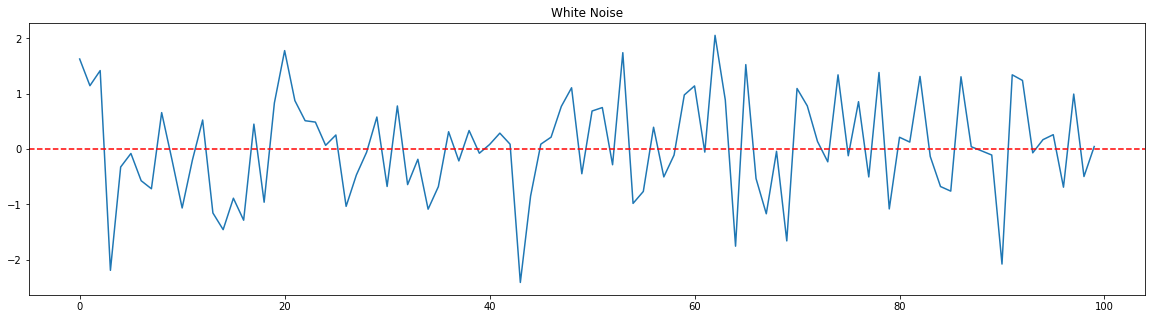

Text(0.5,1,'Correlation')

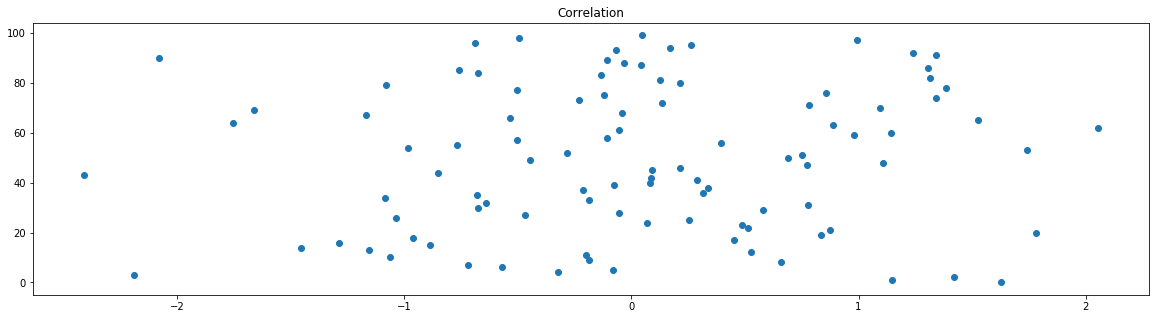

In [321]:
# 1- White Noise Example

import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.pylab import plt

# Generating a random variable
random = pd.DataFrame(np.random.normal(0, 1, size=100))
random.reset_index(inplace=True)

#Plotting the series - The series oscillates around the mean
plt.figure(figsize=(20,5))
plt.plot(random[0])
plt.axhline(y=0,linestyle='--', color = 'red')
plt.title('White Noise')
plt.show()

#Plotting the correlation - No Corelation among the values
plt.figure(figsize=(20,5))
plt.plot(random[0],random.index,'o')
plt.title('Correlation')

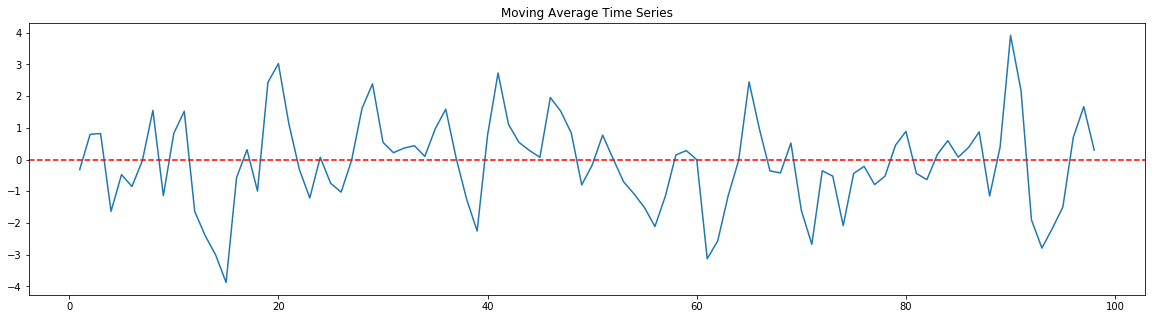

Text(0.5,1,'Correlation')

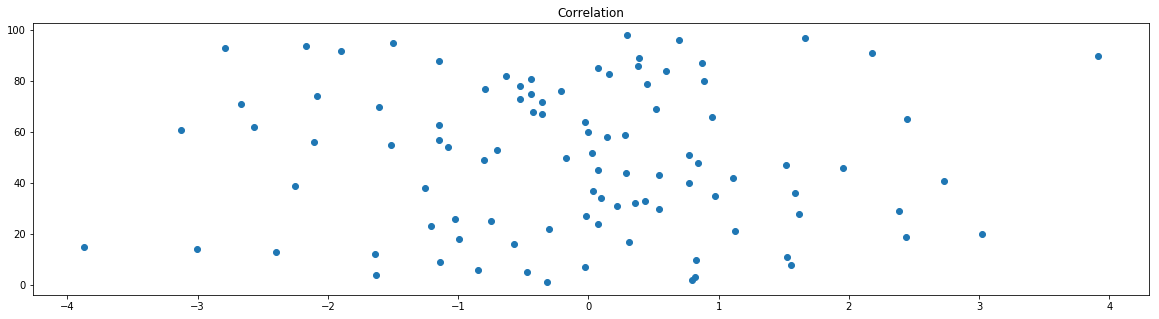

In [319]:
# 2 - Moving Average function
error = np.random.randn(100)
time_series = [(error[period] + error[period-1]*.9) for period in range(1,100)]
ma = pd.DataFrame(time_series[1:], index = range(1,99))

plt.figure(figsize=(20,5))
plt.plot(ma[0])
plt.axhline(y=0,linestyle='--', color = 'red')
plt.title('Moving Average Time Series')
plt.show()

#Plotting the correlation - Better Correlation than the last one
plt.figure(figsize=(20,5))
plt.plot(ma[0],ma.index,'o')
plt.title('Correlation')

<a id='Where to start from?'></a>

# Where to start from?

Now that you know a bit about time series and how it looks like. If you are given a time series, where will start from?

1. Check the mean function and the Variance Function of the time series. 
2. If the series turns out to be white noise, discard it. 
3. Look for the trends in the series.
4. Make the series stationary (if not already stationary)
5. Apply prediction model, if you are successful in making it stationary

<a id='Is my Time Series Stationary?'></a>

### Is my Time Series Stationary?

**For time series prediction, we need Stationary Time Series.** Let us see what is meant by stationary time series.
There are three basic qualities of the stationary time series. <br>

  a. The mean should be constant over time <br>
  E($Y_{t}$) = c <br>
  b. The covariance should not be the function of time, only depends on the distance between two times <br>
  Cov(Y$_{t}$ , Y$_{t-k}$) = ${\gamma}$$_{k}$
  
Now that we know what is stationarity and its requirement in forecasting. We need to think about the folowwing? <br>

a. Is White Noise Stationary? <br>
Yes <br>

b. Is Moving Average Stationary? <br>
Yes

c. Is Random Walk Stationary? <br>
No

<a id='Trends'></a>

### Trends

The Trend is the change in the mean. 

If we think there is a deterministic trend then we can decompose our process like:

$Y_{t}$ = ${\mu}$$_{t}$ + $X_{t}$

${\mu}$$_{t}$ is the deterministic function of t and ${X}$$_{t}$ is a random deviation with E(${X}$$_{t}$) = 0.

Some Simple examples of ${\mu}$$_{t}$:

1. Constant
2. Linear
3. Seasonal
4. Cosine (Cycle)

<a id='Make Time Series Stationary'></a>

### Make Time Series Stationary

Let's take an example of the time series. This is Air Passengers data month over month

In [76]:
#Load the data
AirPassengers = pd.read_csv("AirPassengers.csv")
#Change the index
AirPassengers = AirPassengers.set_index('Month')

#Change the column name
AirPassengers = AirPassengers.rename(columns={"#Passengers": "travellers"})

#Looking at the data
#AirPassengers.head()

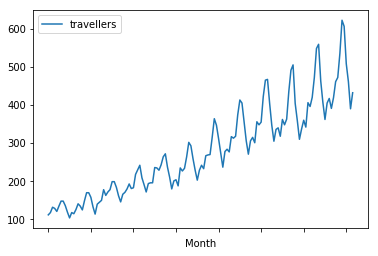

In [75]:
#Plotting the data to analyse the trend and Seasonality
AirPassengers.plot()
plt.show()

The plot shows that there is an increasing trend month over month. Also, it has a periodic pattern which is rising and falling ,seasonality. We will still do a formal check and plot mean and variance.

Let us do stationary check in the Air Passenger data.The below 2 plots show that the mean and variance are time dependent. Hence it is not stationary time series.

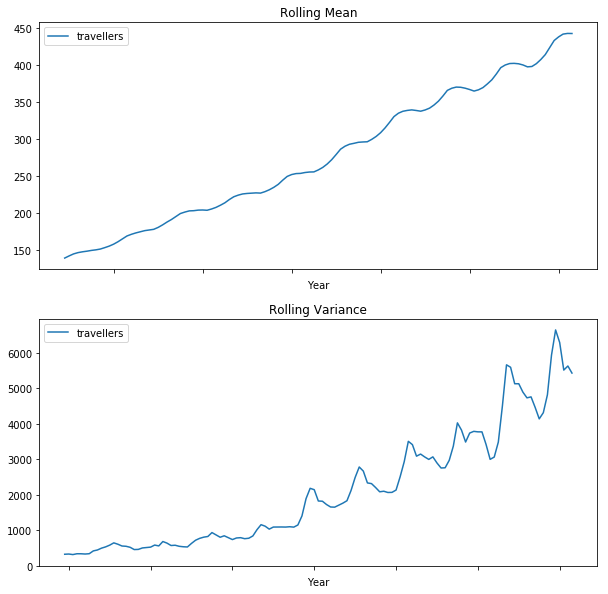

In [297]:
fig, axs = plt.subplots(2, figsize=(10,10))
fig.subplots_adjust(wspace=1)

#Checking the variablity in mean
AirPassengers.rolling(window = 30).mean().plot(ax=axs[0])

axs[0].set_title('Rolling Mean')
axs[0].set_xlabel('Year',  fontsize = 10)

#Checking the variablity in variance
AirPassengers.rolling(window = 20).var().plot(ax=axs[1])
axs[1].set_title('Rolling Variance')
axs[1].set_xlabel('Year',  fontsize = 10)
plt.figure(figsize=(20,20))
plt.show()


<a id='How to make a time series Stationary?'></a>

### How to make a time series Stationary?

We can make the time series stationary by doing transformations and differences. <br>
We will look at couple ways below and see which ones work on this data. 

Note: 
a. The techqniques can differ based on the dataset. <br>
b. We should be able to trace back all the transformations we do on the data, to get the original data. <br>
c. You can see the original data on the right and compare with the transformed data on the left, to see how the series is changing.<br>

** 1) Taking the Log Transformation ** : The variance in data seems to be controlled after log transformation and same for all time periods

Text(0.5,0,'Year')

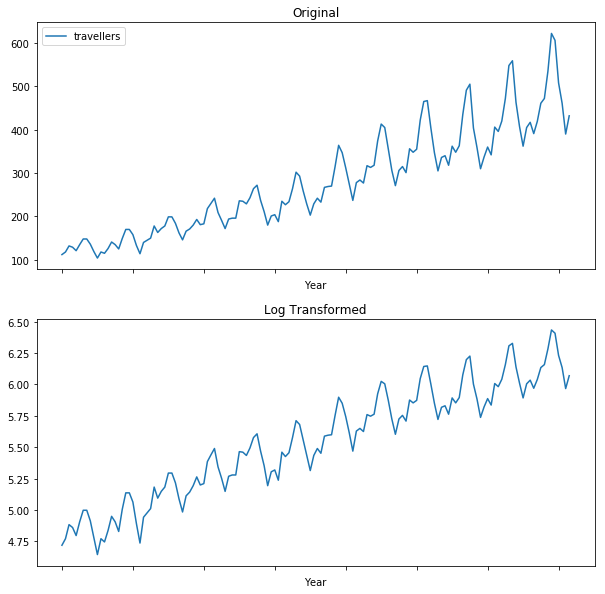

In [268]:
fig, axs = plt.subplots(2, figsize=(10,10))
fig.subplots_adjust(wspace=1)


#Original Data
AirPassengers.plot(ax=axs[0])
axs[0].set_title('Original')
axs[0].set_xlabel('Year',  fontsize = 10)

#Log transformation of the travellers data
travellers_log_transformed = AirPassengers.travellers.apply(lambda y: np.log(y))
travellers_log_transformed.plot(ax=axs[1])
axs[1].set_title('Log Transformed')
axs[1].set_xlabel('Year',  fontsize = 10)

** 2) Differencing ** - We still need to get rid of the trend. Below shows 3 ways in which diferrencing can be performed. <br>
a. Difference with the mean of a specific window size <br>
b. Difference with the (t-1) value <br>
c. Difference with the regression fit values.<br>

Here we see the difference with the mean gives a nice stationary time series. Hence we will use it for further analysis.

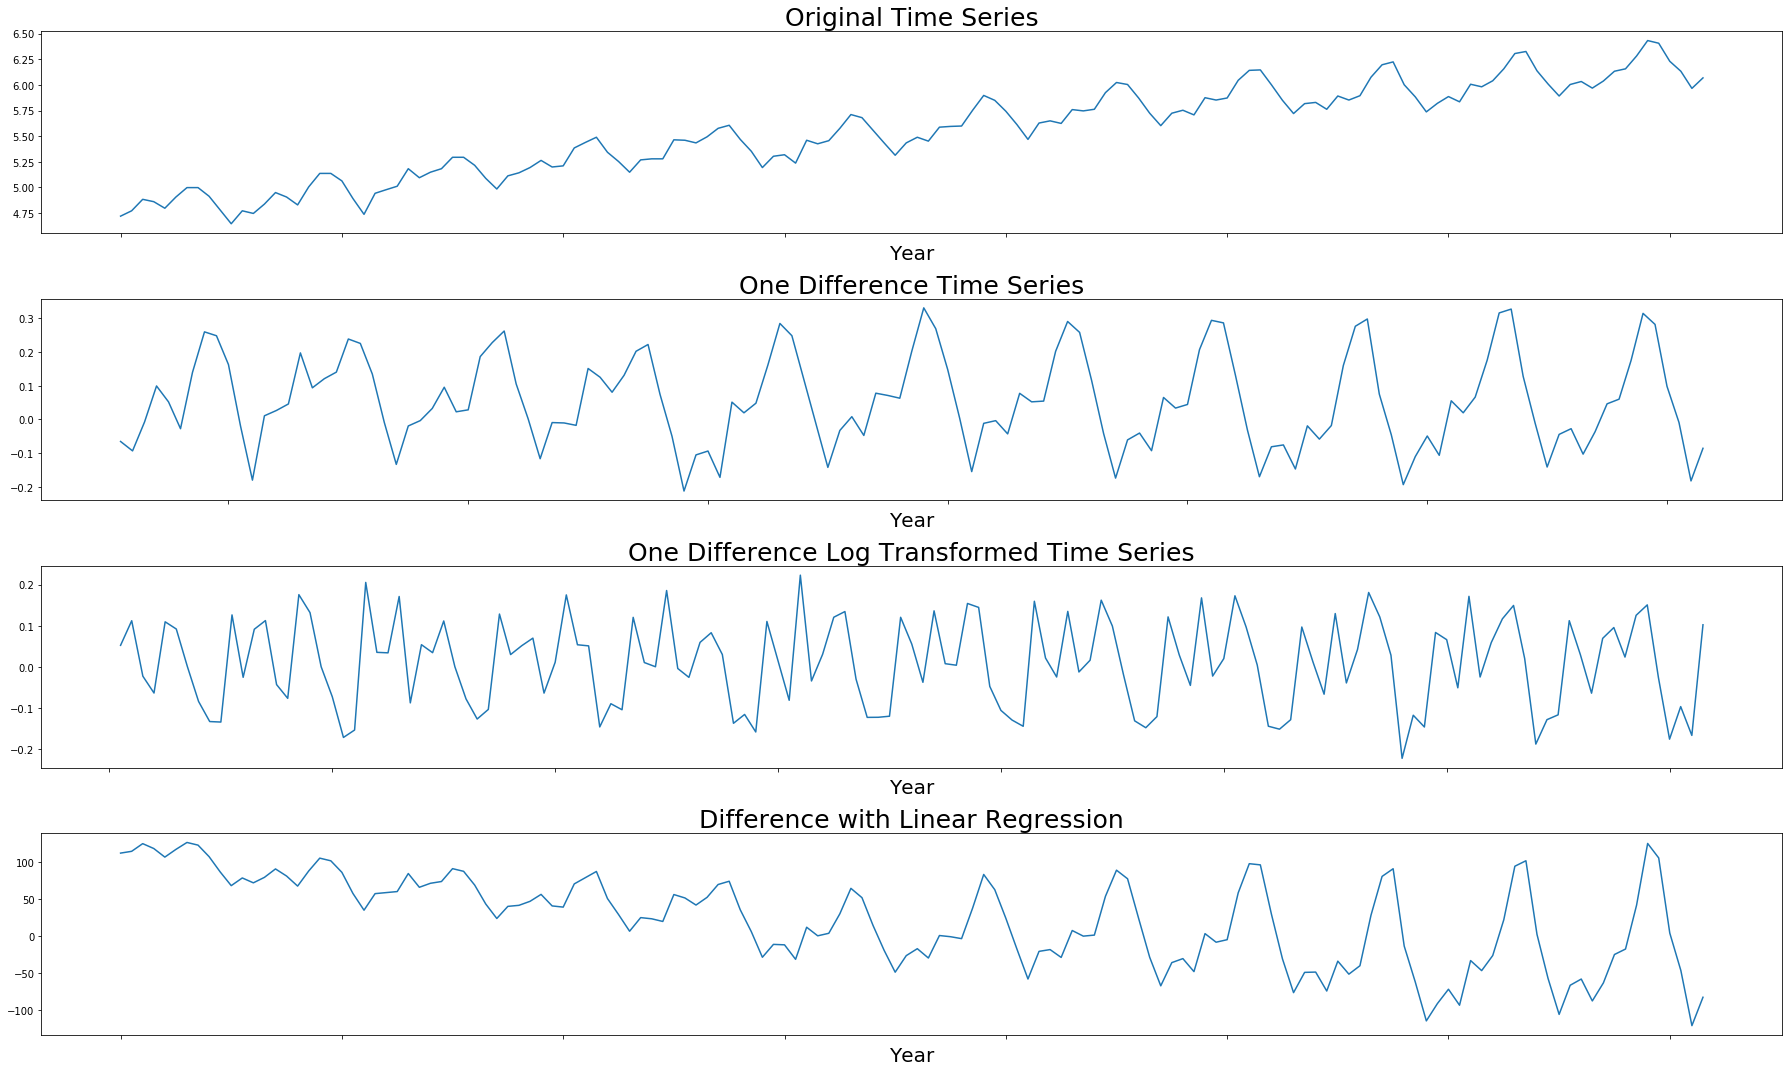

In [261]:
from statsmodels.regression.linear_model import OLS

fig, axs = plt.subplots(4, figsize=(25,15))
fig.subplots_adjust(wspace=1)

#Log transformation of the travellers data
travellers_log_transformed = AirPassengers.travellers.apply(lambda y: np.log(y))
travellers_log_transformed.plot(ax=axs[0])
axs[0].set_title('Original Time Series', fontsize = 25)
axs[0].set_xlabel('Year',  fontsize = 20)

# Differencing - 1 : Difference with the mean
sliding_mean = travellers_log_transformed.rolling(window = 12).mean()
travellers_log_detrended_diff1 = travellers_log_transformed - sliding_mean
travellers_log_detrended_diff1.plot(ax=axs[1])
axs[1].set_title('One Difference Time Series', fontsize = 25)
axs[1].set_xlabel('Year',  fontsize = 20)

# Differencing - 2 :  Difference with the time lag = 1
travellers_log_detrended_diff2 = travellers_log_transformed - travellers_log_transformed.shift()
travellers_log_detrended_diff2.plot(ax=axs[2], title='sds')
axs[2].set_title('One Difference Log Transformed Time Series', fontsize = 25)
axs[2].set_xlabel('Year',  fontsize = 20)

# Differencing - 3 :Difference with Linear Regression Fit

#Creating the linear fit out of the data provided
Y = AirPassengers.travellers
X = range(len(Y))
linear_model = OLS(Y,list(X))
linear_fit = linear_model.fit()
y_pred = linear_fit.predict(range(len(Y)))
#Calculating the difference 
diff_3 = Y - y_pred
pd.Series(diff_3, index = Y.index).plot(ax=axs[3])
axs[3].set_title('Difference with Linear Regression', fontsize = 25)
axs[3].set_xlabel('Year',  fontsize = 20)

plt.tight_layout()


<a id='Forecasting'></a>

# Forecasting

<a id='Moving Average Model'></a>

## Moving Average Model

A Moving Average term in a time series model is a past error (multiplied by a coefficient).

Assume $e_{t}$ is the white noise i.e. $e_{t}$ ~ N(0, 1)

MA(1): $Y_{t}$ = ${\mu}$ + $e_{t}$ + ${\phi}$$e_{t-1}$

MA(2): $Y_{t}$ = ${\mu}$ + $e_{t}$ + ${\phi}$$e_{t-1}$ + ${\phi}$$e_{t-2}$

To calculate the degree of the Moving Average Model we use the ACF curve. In the below example, we plot the MA(1) model and the correlation drops below significance level after 1. Hence the degree of MA model will be 1.

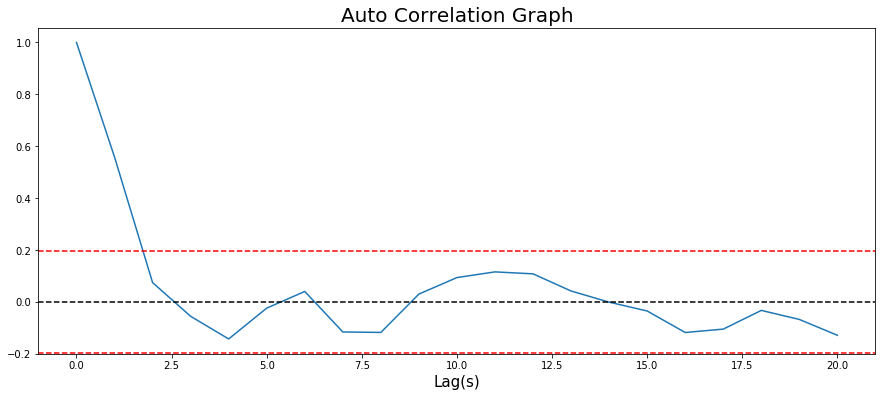

In [292]:
from statsmodels.tsa.stattools import acf

#Generating Moving Average Series
moving_average_series = []
theta = .9
error = np.random.randn(100)
for period in range(1,100):
    moving_average_series.append(error[period] + theta*error[period-1])

ma1 = pd.Series(moving_average_series[1:], index = range(1,99))

#Plotting Auto Correlation function
ma_acf = acf(ma1, nlags = 20)
plt.plot(ma_acf)
plt.title('Auto Correlation Graph', fontsize = 20)
plt.xlabel('Lag(s)', fontsize = 15)

plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(EarthQuake)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(EarthQuake)),linestyle='--', color = 'red')

<a id='Auto Regressive Mode'></a>

## Auto Regressive Model

The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term)

In AR model, the current response variable is dependent on the previous response variables. <br>
AR(1) Model : $\widehat{Y}$$_{t}$ = ${\theta}$$_{0}$ + ${\theta}$$_{1}$$Y_{t-1}$ + $e_{t}$   <br>

However, In AR(k) Model, we wish the association between $Y_{t-k}$ and $Y_{t}$ and ** NOT** all the terms in between ($Y_{t-2}$ ...$Y_{t-k-1}$). Partial Correlation function (** PACF **) is perfect for calculating the order (** k **) <br>
AR(k) Model : $\widehat{Y}$$_{t}$ = ${\theta}$$_{k}$$Y_{t-k}$ + $e_{t}$

We are using the Earthquake data, annual number of global earthquakes with magnitude greater than 7. <br>
After plotting the time series, we will see the PACF and calculate the order. Here is is between 2 and 3.
When we plot the AR model, we will confirm 

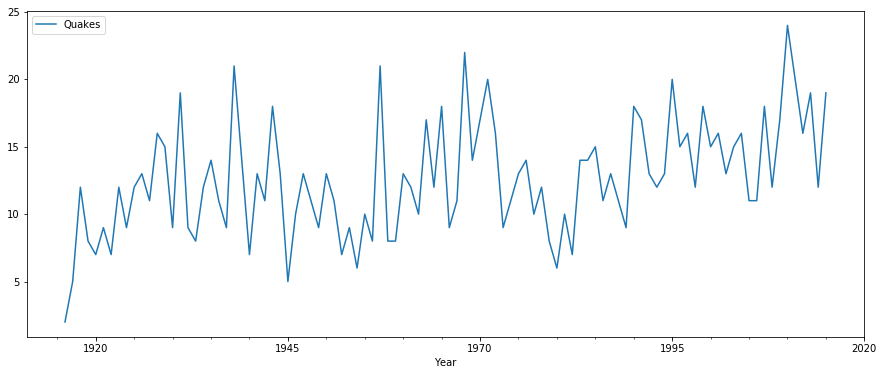

In [227]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.ar_model import AR


#Load the Data
EarthQuake = pd.read_csv("earthquakes.csv")
#Set the time as the index
EarthQuake.set_index('Year', inplace = True)
#Convert year to date time, this is necessary for time series to work
EarthQuake.index = pd.to_datetime(EarthQuake.index, format='%Y')
plt.figure(figsize=(20,5))
#Plot the series
EarthQuake.plot()

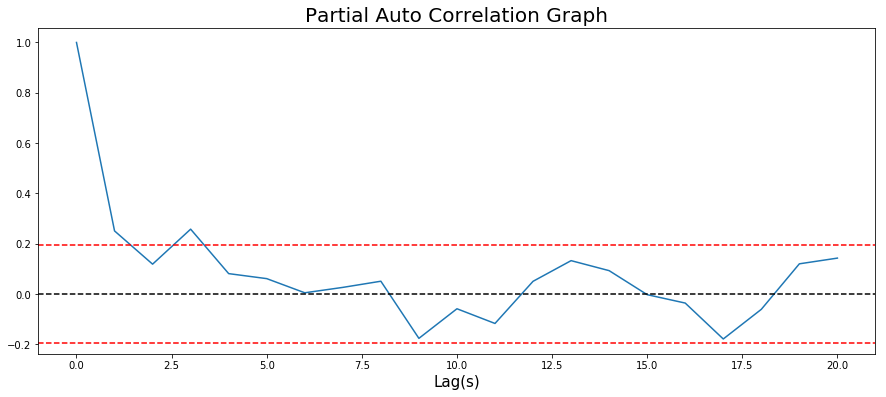

In [291]:
# Plot the partial correlation graph
EarthQuake_pacf = pacf(EarthQuake, nlags = 20)
plt.plot(EarthQuake_pacf)
plt.title('Partial Auto Correlation Graph', fontsize = 20)
plt.xlabel('Lag(s)', fontsize = 15)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(EarthQuake)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(EarthQuake)),linestyle='--', color = 'red')
plt.figure(figsize=(20,5))

By plotting automatic AR model we get the same results with degree = 3

In [86]:
earthquake_AR_model = AR(EarthQuake).fit(maxlag=30, ic='aic')

In [88]:
print(earthquake_AR_model.pvalues)
print(earthquake_AR_model.params)

const        0.000306
L1.Quakes    0.102667
L2.Quakes    0.481759
L3.Quakes    0.005913
dtype: float64
const        6.449158
L1.Quakes    0.164238
L2.Quakes    0.071252
L3.Quakes    0.269282
dtype: float64


<a id='ARIMA'></a>

## ARIMA Model - Auto Regressive Integrated Moving Average (ARIMA)

** 1) 'I' stands for differencing the time series to make it stationary ** <br>
** 2) 'AR' stands for regression over previous time values** <br>
** 3) 'MA' stands for lags of the forecast error ** <br>
<br>
<font color='red'> ** Assumption - ** Reiterating the fact that the ARIMA model works only on stationary Time Series </font>


$\widehat{y}$$_{t}$ = Constant + AR Terms (${\phi}$) + MA terms (${\theta}$)

$\widehat{y}$$_{t}$ = ${\mu}$ + ${\phi}$$e_{t-1}$ + ${\phi}$$e_{t-2}$ + .....+ ${\phi}$$e_{t-p}$ + ${\theta}$$Y_{t-1}$ + ${\theta}$$Y_{t-2}$ + .....+ ${\theta}$$Y_{t-p}$

We will try ARIMA model on the Air Passenger Data

** Note: We are using plain ARIMA on the data that has seasonality, hence this will not give the perfect result. Seasonal ARIMA is out of scope of this tutorial.**

Text(0.5,1,'Transformed Time Series')

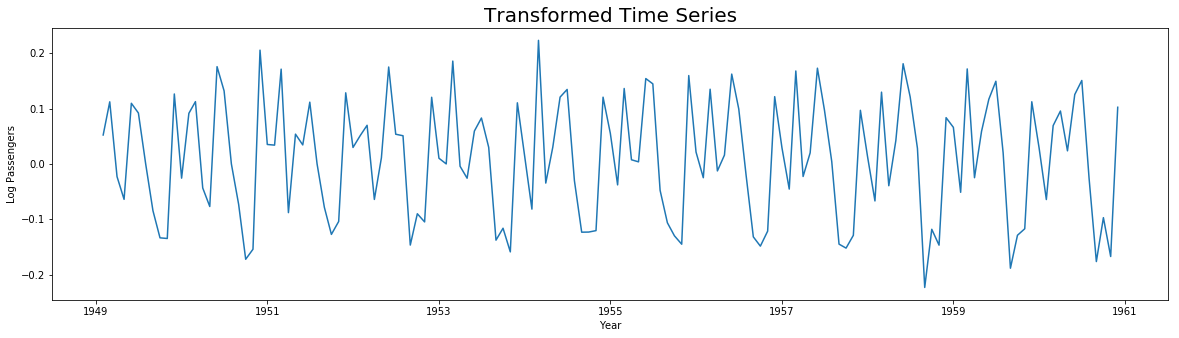

In [289]:
#Starting from the scrath for the Data Cleaning

#Load Data, change index and rename columns
Passengers = pd.read_csv("AirPassengers.csv", parse_dates = [0])
#Set Month as index
Passengers = Passengers.set_index('Month')
#Change the name of the columns
Passengers = Passengers.rename(columns={"#Passengers": "travellers"})

#Log transformations
travellers_log_transformed = np.log(Passengers.travellers)
#Difference of one to remove Randown Walk
travellers_log_detrended = travellers_log_transformed - travellers_log_transformed.shift()
travellers_log_detrended.dropna(inplace=True)

#Plot the time series
plt.figure(figsize=(20,5))
plt.xlabel('Year')
plt.ylabel('Log Passengers')
plt.plot(travellers_log_detrended)

plt.title('Transformed Time Series', fontsize = 20)

Once we have got the stationary Time Series (Here it is not completely stationary but we will go ahead with what we have), we can plot ACF And PCF plot to get the degree of each model.

For MA term we get degree of 1 by plotting ** ACF ** curve. We look at the ACF curve and see where is the plot crossing the significance level. Here at 12.5 also it crossing the level, however it is because there is seasonality in data and we are not able to completely make the series as stationary. We will ignore it for now.

Text(0.5,0,'Lag(s)')

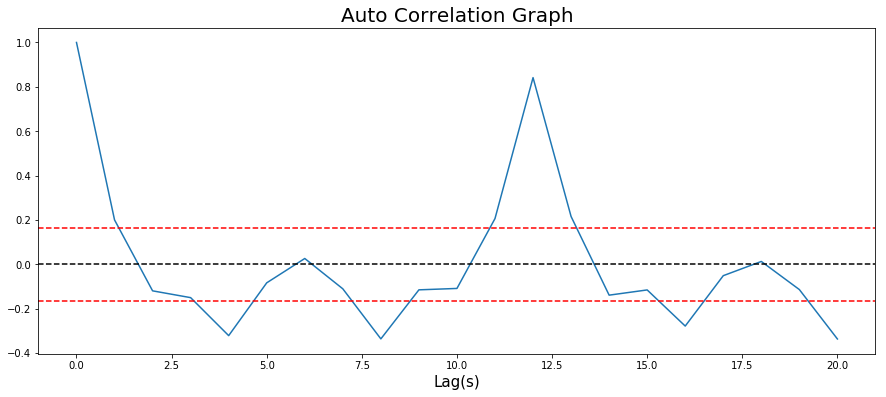

In [286]:
#Plotting ACF 
passanger_acf = acf(Passengers_log_detrended, nlags = 20)
plt.plot(passanger_acf)
plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(Passengers_log_detrended)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(Passengers_log_detrended)),linestyle='--', color = 'red')

plt.title('Auto Correlation Graph', fontsize = 20)
plt.xlabel('Lag(s)', fontsize = 15)

For AR model we get the degree of 2 by plotting ** PACF ** curve

Text(0.5,0,'Lag(s)')

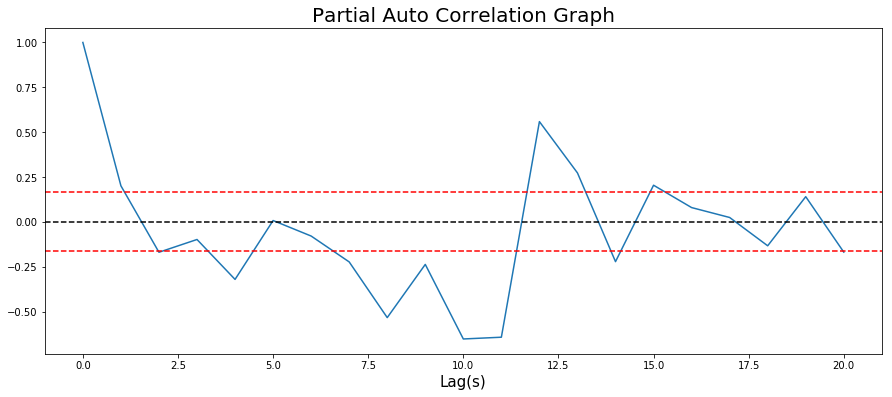

In [285]:
#PLotting PACF

passanger_pacf = pacf(Passengers_log_detrended, nlags = 20)
plt.plot(passanger_pacf)

plt.axhline(y=0,linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(Passengers_log_detrended)),linestyle='--', color = 'red')
plt.axhline(y=1.96/np.sqrt(len(Passengers_log_detrended)),linestyle='--', color = 'red')

plt.title('Partial Auto Correlation Graph', fontsize = 20)
plt.xlabel('Lag(s)', fontsize = 15)

Now that we have the degree for each term we will plot the ARIMA model.

Red shows the original trend line and green show the one we got from ARIMA model. It does not capture the variation but it looks like it covering the randomness pretty well.

Text(0.5,1,'Comparing log transformed original and Predicted Data')

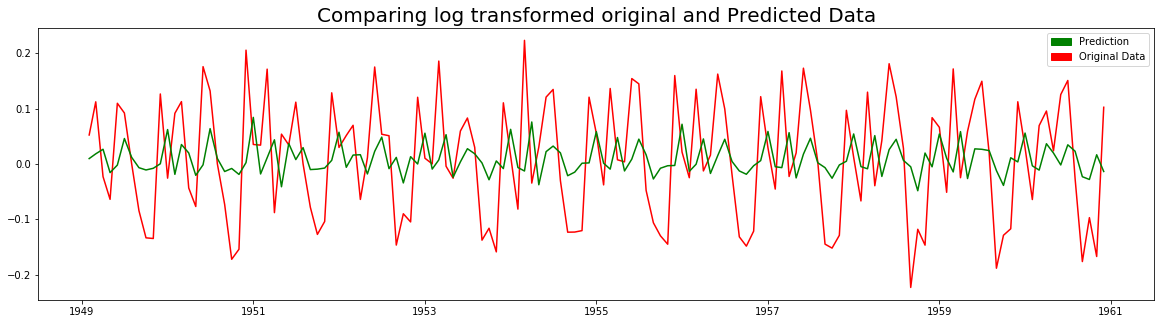

In [281]:
from statsmodels.tsa import arima_model

# Order(p,q,d) - p: AR term degree, q: MA term degree and 0 - difference
passenger_ARIMA_model = arima_model.ARIMA(Passengers_log_transformed, order=(2, 1, 0))
pred_passenger = passenger_ARIMA_model.fit(disp = -1)
plt.figure(figsize=(20,5))
plt.plot(Passengers_log_detrended, color='red')
plt.plot(pred_passenger.fittedvalues, color='green')

red_patch = mpatches.Patch(color='Red', label='Original Data')
green_patch = mpatches.Patch(color='Green', label='Prediction')
plt.legend(handles=[green_patch, red_patch])
plt.title('Comparing log transformed original and Predicted Data', fontsize = 20)

We will remove our monotonic transformations from the prediction and plot it against the original time series

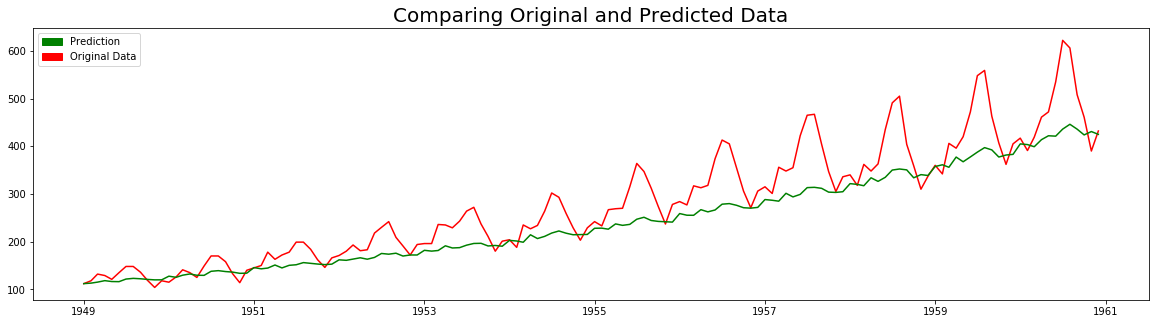

In [279]:
import matplotlib.patches as mpatches

pred_passenger_1 = pd.Series(pred_passenger.fittedvalues, copy=True)

#Get back the differenc of the one
pred_passenger_diff = pred_passenger_1.cumsum()
pred_passenger_1_log_2 = pd.Series(Passengers_log_transformed.iloc[0], index=Passengers_log_transformed.index)
pred_passenger_1_log_3 = pred_passenger_1_log_2.add(pred_passenger_diff,fill_value=0)

#Unlog the values
traced_back_predictions = np.exp(pred_passenger_1_log_3)

plt.figure(figsize=(20,5))

red_patch = mpatches.Patch(color='Red', label='Original Data')
green_patch = mpatches.Patch(color='Green', label='Prediction')
plt.legend(handles=[green_patch, red_patch])
plt.title('Comparing Original and Predicted Data', fontsize = 20)

#Plotting the original Series
plt.plot(Passengers, color = 'Red')

#Plotting the predicted result
plt.plot(traced_back_predictions, color = 'GReen')

<a id='Further'></a>

## Further Topics:

1. Dickey Fuller Test - Hypothesis Testing for Stationarity
http://www.ams.sunysb.edu/~zhu/ams586/UnitRoot_ADF.pdf

2. Seasonal ARIMA: 
https://onlinecourses.science.psu.edu/stat510/node/67 